In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Zoo.csv')

In [ ]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.shape

(101, 18)

In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

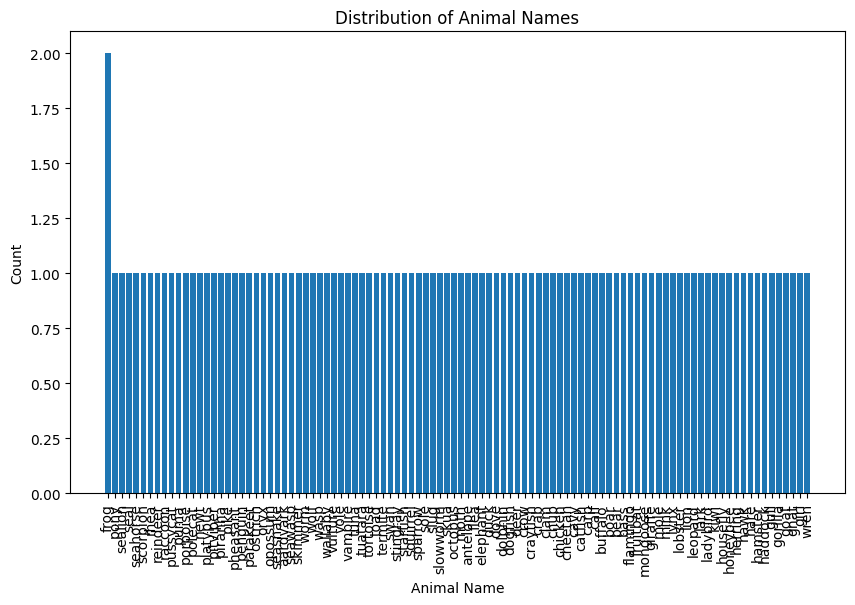

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library

# Analyze the data using visualizations
plt.figure(figsize=(10, 6))

# Correct the column name from 'animal name' to 'animal_name'
plt.bar(df['animal_name'].value_counts().index, df['animal_name'].value_counts().values)
plt.xlabel('Animal Name') # Update x-axis label
plt.ylabel('Count')
plt.title('Distribution of Animal Names') # Update title
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X = df.drop('animal_name', axis=1)  # features - Correct the column name from 'animal_type' to 'animal name'
y = df['animal_name']  # target variable - Correct the column name from 'animal_type' to 'animal name'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Implement the K-Nearest Neighbours algorithm using scikit-learn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # choose K and distance metric
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Evaluate the classifier's performance on the testing set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


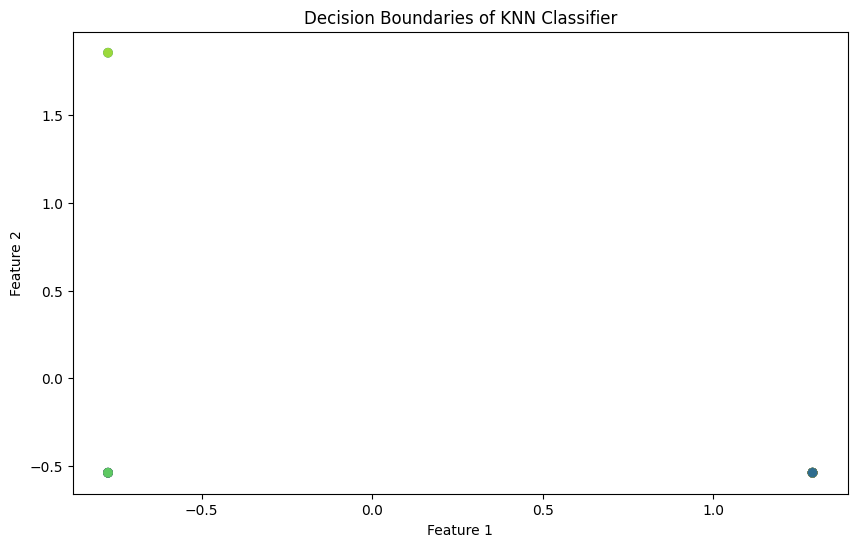

In [ ]:
# Visualize the decision boundaries of the classifier
plt.figure(figsize=(10, 6))

# Convert animal names to numerical labels using LabelEncoder
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Use the encoded labels for the color argument
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test_encoded)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of KNN Classifier')
plt.show()

In [ ]:
#INTERVIEW QUESTIONS:

1. What are the key hyperparameters in KNN?
ANSWER:
The key hyperparameters in K-Nearest Neighbors (KNN) are:

K: The number of nearest neighbors to consider when making a prediction. A smaller value of K can lead to overfitting, while a larger value can lead to underfitting.
Distance metric: The distance metric used to calculate the distance between data points. Common distance metrics include Euclidean, Manhattan, and Minkowski.
Weighting: Whether to use uniform weighting or distance-based weighting when combining the predictions from the nearest neighbors.
2. What distance metrics can be used in KNN?

ANSWER:Common distance metrics used in KNN include:

Euclidean distance: The straight-line distance between two points in n-dimensional space.
Manhattan distance: The sum of the absolute differences between corresponding coordinates.
Minkowski distance: A generalization of Euclidean and Manhattan distances, with a parameter p that controls the distance metric.
Cosine distance: A measure of the cosine of the angle between two vectors.
Hamming distance: The number of positions at which two strings differ.
These distance metrics can be used depending on the nature of the data and the specific problem being addressed.